In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import.

In [3]:
file = pd.read_csv(r"C:\Users\Owner\Desktop\imar ml\Machine Learning\Linear Regression\Salary_Data.csv")
file.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


## Outliers Check.

<AxesSubplot:>

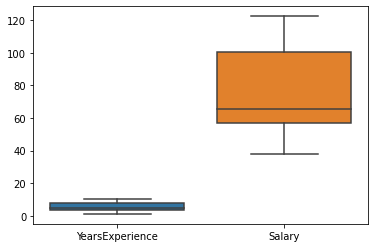

In [4]:
sns.boxplot(data = file)

## Splitting.

In [5]:
## splitting
x = file.drop(["Salary"],axis=1)
y = file[["Salary"]]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size =0.7,random_state=100)


In [6]:
train = pd.concat([X_train, y_train],axis=1)
train.head()

,YearsExperience,Salary
17,5.3,83.088
22,7.9,101.302
11,4.0,55.794
4,2.2,39.891
29,10.5,121.872


## correlation

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

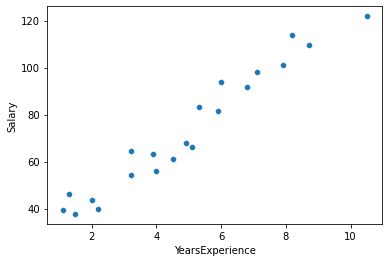

In [7]:
sns.scatterplot(x="YearsExperience",y="Salary",data= train)


## Correlation matrix

In [8]:
train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.974123
Salary,0.974123,1.000000


<AxesSubplot:>

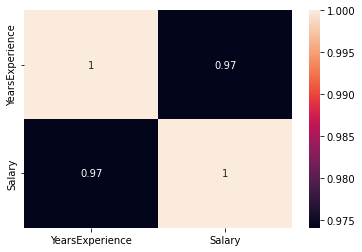

In [9]:
sns.heatmap(train.corr(),annot=True)

## Model building

* H0 : There is no relation between salary and experiance .
* H1 : There is relation between salary and experiance .

In [10]:
import statsmodels.formula.api as smf

model  = smf.ols("Salary ~ YearsExperience" , data =train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           9.91e-14
Time:                        16:59:49   Log-Likelihood:                -66.742
No. Observations:                  21   AIC:                             137.5
Df Residuals:                      19   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.2029      2.875      8.765      0.000      19.185      31.221
YearsExperience     9.7312      0.518     18.786      0.000       8.647      10.815
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* we reject H0 , the accuracy of model is 95% so the model is good fit.
* Y   = 25 + 9.73 * Experience.

## Assumptions
* Linearity.
* Normality.
* Homoscedasticity .
* Residual auto correlation.

## Linearity

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

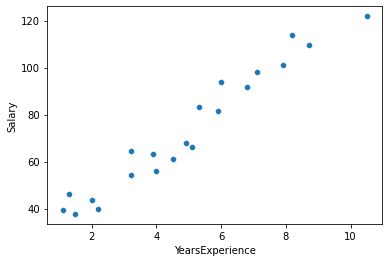

In [11]:


sns.scatterplot(x="YearsExperience",y="Salary",data =train)

In [12]:
train["Fitted"] = model.fittedvalues
train["Residual"] =model.resid
train.head()

,YearsExperience,Salary,Fitted,Residual
17,5.3,83.088,76.778268,6.309732
22,7.9,101.302,102.079398,-0.777398
11,4.0,55.794,64.127703,-8.333703
4,2.2,39.891,46.611536,-6.720536
29,10.5,121.872,127.380528,-5.508528


## Normaltiy

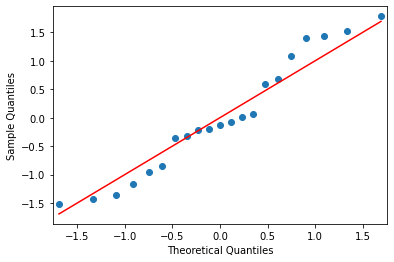

In [13]:

import statsmodels.api as sm

fig = sm.qqplot(train["Residual"],fit=True ,line="s")
plt.show()

## Homoscedasicity

<AxesSubplot:xlabel='Fitted', ylabel='Residual'>

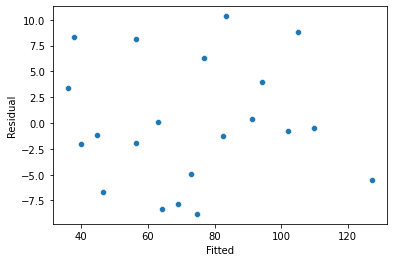

In [14]:
 

sns.scatterplot(x="Fitted" ,y ="Residual" ,data = train)

## Autocorrelation

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


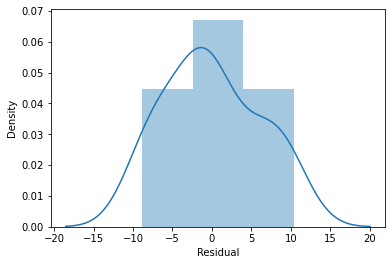

In [16]:
ax=sns.distplot(train.Residual)

## Test

In [17]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,YearsExperience,Salary
9,3.7,57.189
26,9.5,116.969
28,10.3,122.391
13,4.1,57.081
5,2.9,56.642


In [18]:
test["Predict"] = model.predict(test)
test.head()

,YearsExperience,Salary,Predict
9,3.7,57.189,61.208342
26,9.5,116.969,117.649324
28,10.3,122.391,125.434287
13,4.1,57.081,65.100824
5,2.9,56.642,53.423379


## R2 score for Train and Test.

In [19]:
from sklearn.metrics import r2_score
score = r2_score(test["Salary"],test["Predict"])
print(np.round(score,2))

0.96


In [20]:
train_Score = r2_score(train["Salary"],train["Fitted"])
print(np.round(train_Score,2))

0.95
